In [36]:
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

In [37]:
stats_path = Path('stats')

In [62]:
stats = pd.concat(
    [pd.read_table(filename, 
                   header=None, 
                   delim_whitespace=True, 
                   usecols=[0, 1, 2], 
                   names=['day', 'gold', 'silver'])
       .assign(year=re.search(r'\d+', filename.name).group(0))
    for filename in stats_path.glob('*.txt')])
stats

,day,gold,silver,year
0,25,5388,2127,2015
1,24,6236,84,2015
2,23,7298,38,2015
3,22,5949,162,2015
4,21,7911,179,2015
...,...,...,...,...
3,5,111665,2029,2022
4,4,133820,2213,2022
5,3,146423,7223,2022
6,2,172346,7649,2022


In [63]:
starters = stats.loc[stats['day'] == 1].set_index('year')

In [66]:
scaled = stats.copy()
scaled['gold'] = scaled['gold'] / scaled.join(starters, on='year', lsuffix='_stats')['gold']
scaled['silver'] = scaled['silver'] / scaled.join(starters, on='year', lsuffix='_stats')['silver']
scaled.loc[scaled['day']==22]

,day,gold,silver,year
3,22,0.084053,0.010393,2015
3,22,0.181942,0.187559,2016
3,22,0.149418,0.014633,2017
3,22,0.063823,0.058550,2018
3,22,0.042380,0.181384,2019
3,22,0.103949,0.236312,2020
3,22,0.073644,0.212188,2021


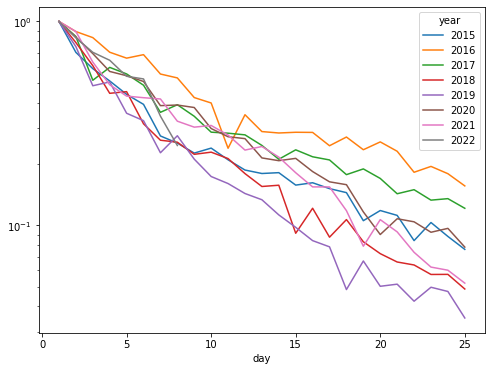

In [72]:
gold = scaled.pivot(index='day', columns='year', values='gold')
ax = gold.plot(figsize=(8,6))
ax.set_yscale("log")

In [64]:
starters

,day,gold,silver
year,,,
2015,1,70777,15588
2016,1,22007,6382
2017,1,51038,10114
2018,1,74143,20649
2019,1,107174,15062
2020,1,176028,14392
2021,1,217953,28536
2022,1,207470,8558
